In [1]:
import torch
x_data = torch.Tensor([[1],[2],[3]])
y_data = torch.Tensor([[2],[4],[6]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_predict=',y_test.data)

0 tensor(27.1164, grad_fn=<MseLossBackward>)
1 tensor(21.4544, grad_fn=<MseLossBackward>)
2 tensor(16.9788, grad_fn=<MseLossBackward>)
3 tensor(13.4409, grad_fn=<MseLossBackward>)
4 tensor(10.6444, grad_fn=<MseLossBackward>)
5 tensor(8.4338, grad_fn=<MseLossBackward>)
6 tensor(6.6863, grad_fn=<MseLossBackward>)
7 tensor(5.3049, grad_fn=<MseLossBackward>)
8 tensor(4.2129, grad_fn=<MseLossBackward>)
9 tensor(3.3496, grad_fn=<MseLossBackward>)
10 tensor(2.6672, grad_fn=<MseLossBackward>)
11 tensor(2.1276, grad_fn=<MseLossBackward>)
12 tensor(1.7010, grad_fn=<MseLossBackward>)
13 tensor(1.3638, grad_fn=<MseLossBackward>)
14 tensor(1.0971, grad_fn=<MseLossBackward>)
15 tensor(0.8862, grad_fn=<MseLossBackward>)
16 tensor(0.7194, grad_fn=<MseLossBackward>)
17 tensor(0.5875, grad_fn=<MseLossBackward>)
18 tensor(0.4831, grad_fn=<MseLossBackward>)
19 tensor(0.4005, grad_fn=<MseLossBackward>)
20 tensor(0.3351, grad_fn=<MseLossBackward>)
21 tensor(0.2834, grad_fn=<MseLossBackward>)
22 tensor(0.242

epoch= 0 loss= tensor(0.6509, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 1 loss= tensor(0.6490, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 2 loss= tensor(0.6472, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 3 loss= tensor(0.6453, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 4 loss= tensor(0.6435, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 5 loss= tensor(0.6418, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 6 loss= tensor(0.6400, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 7 loss= tensor(0.6383, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 8 loss= tensor(0.6367, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 9 loss= tensor(0.6351, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 10 loss= tensor(0.6335, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 11 loss= tensor(0.6319, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 12 loss= tensor(0.6304, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 13 loss= tensor(0.6289, grad_fn=<BinaryCrossEntropyBackward>)
epoch= 14 loss= tensor(0.6275, grad_fn=<Bina

/home/wangsibo/anaconda3/envs/learntorch_envs/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


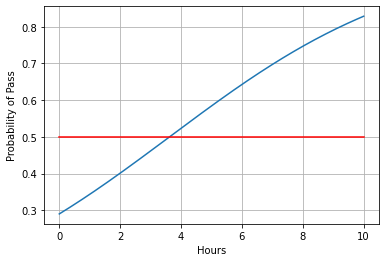

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegressionModel()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print('epoch=',epoch,'loss=',loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print('prediction after training y_pred=',model(torch.Tensor([[4.0]])).data[0])

x = np.linspace(0,10,200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)

plt.plot(x,y_t.data.numpy())
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

In [6]:
import numpy as np
import torch
from torch.utils.data import DataLoader,Dataset
class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath,delimiter=',',dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
    def __len__(self):
        return self.len
    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]

dataset = DiabetesDataset('diabetes.csv.gz')
train_loader = DataLoader(dataset=dataset,
           batch_size=32,
           shuffle=True,
           num_workers=2)

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
    
model = Model()
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(100):
    for i,data in enumerate(train_loader,0):
        inputs,labels = data
        y_pred = model(inputs)
        loss = criterion(y_pred,labels)
        print(epoch,i,loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

0 0 0.7271484136581421
0 1 0.7430304288864136
0 2 0.7337223887443542
0 3 0.725275993347168
0 4 0.7724438905715942
0 5 0.738092303276062
0 6 0.7604565620422363
0 7 0.7358050346374512
0 8 0.7421532273292542
0 9 0.7469468712806702
0 10 0.7318868041038513
0 11 0.7438788414001465
0 12 0.729500949382782
0 13 0.7285540103912354
0 14 0.7395066022872925
0 15 0.725978672504425
0 16 0.7192192077636719
0 17 0.6916255354881287
0 18 0.7294971346855164
0 19 0.7335896492004395
0 20 0.7216551899909973
0 21 0.7069516181945801
0 22 0.7153339982032776
0 23 0.6985618472099304
1 0 0.7194979786872864
1 1 0.713813841342926
1 2 0.7264400720596313
1 3 0.7209197282791138
1 4 0.6949549317359924
1 5 0.7108020186424255
1 6 0.706540584564209
1 7 0.7058284282684326
1 8 0.7209316492080688
1 9 0.7160501480102539
1 10 0.7214003801345825
1 11 0.7002758383750916
1 12 0.7158240079879761
1 13 0.7140964269638062
1 14 0.7240487337112427
1 15 0.708301842212677
1 16 0.7096717953681946
1 17 0.7028372287750244
1 18 0.698750555515

In [12]:
import torch
criterion = torch.nn.CrossEntropyLoss()

y = torch.LongTensor([2,0,1])
y_pred1 = torch.Tensor([[0.1,0.2,0.9],[1.1,0.1,0.2],[0.2,2.1,0.1]])
y_pred2 = torch.Tensor([[0.8,0.2,0.3],[0.2,0.3,0.5],[0.2,0.2,0.5]])

l1 = criterion(y_pred1,y)
l2 = criterion(y_pred2,y)
print("Batch Loss1=",l1.data,"\nBatch Loss2=",l2.data)



Batch Loss1= tensor(0.4966) 
Batch Loss2= tensor(1.2389)


In [ ]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320,10)
    def forward(self,x):
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size,-1)
        x = x.fc(x)
        return x
    
def prepare_data():
    batch_size = 64
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307, ), (0.3081, ))
    ])
    train_dataset = datasets.MNIST(root='./dataset/mnist/',
                                   train=True,
                                   download=True,
                                   transform=transform)
    train_loader = DataLoader(train_dataset,
                              shuffle=True,
                              batch_size=batch_size)
    
    test_dataset = datasets.MNIST(root='./dataset/mnist/',
                                  train=False,
                                  download=True,
                                  transform=transform)
    test_loader = DataLoader(test_dataset,
                             shuffle=False,
                             batch_size=batch_size)
    return train_loader,test_loader

def train(epoch,train_loader):
    running_loss = 0.0 
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target = data
        inputs,target = inputs.to(device),target.to(device)
        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d] loss:%.3f' %(epoch+1,batch_idx+1,running_loss/2000))
            running_loss = 0.0

def test(test_loader):
    correct = 0
    total = 0
    with torch.no_grad:
        for data in test_loader:
            inputs,target = data
            inputs,target = inputs.to(device),target.to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs.data,dim=1)
            total += target.size(0)
            correct += (predicted==target).sum().item()
        print('Accuracy on test set: %d %% [%d%d]' % (100*correct / total,correct,total))

model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

if __name__ == '__main__':
    for epoch in range(10):
        train_loader,test_loader = prepare_data()
        train(epoch,train_loader)
        test(test_loader)

    

Extracting ./dataset/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/mnist/MNIST/raw


100.1%